In [1]:
import plotly.graph_objects as go

import networkx as nx

import pandas as pd

from dataclasses import dataclass, field
import matplotlib.pyplot as plt

from dowhy.gcm.falsify import FalsifyConst, falsify_graph

/Users/mladernm/Library/Caches/pypoetry/virtualenvs/causal-data-D4p6ABlf-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
@dataclass
class Translation:
    
    original: str
    translated: str


@dataclass
class Attributes:
    
    is_black = Translation(original="black", translated="is_black")
    education = Translation(original="educ", translated="education")
    log_wage = Translation(original="lwage", translated="log_wage")
    experience = Translation(original="exper", translated="experience")
    is_south = Translation(original="south", translated="is_south")
    is_married = Translation(original="married", translated="is_married")
    is_urban = Translation(original="smsa", translated="is_urban")
    is_near_college = Translation(original="nearc4", translated="is_near_college")
    
    def get_all_attributes(self):
        return [
            self.education,
            self.log_wage,
            self.experience,
            self.is_south,
            self.is_married,
            self.is_urban,
            self.is_near_college,
            self.is_black
        ]
    
    def translate_attributes(self):
        return {att.original: att.translated for att in self.get_all_attributes()}

In [3]:
data = pd.read_stata("./data/close_college.dta")

In [4]:
attributes = Attributes()
data = data.rename(columns=attributes.translate_attributes())

In [5]:
G = nx.DiGraph()
weight = 1
G.add_nodes_from(data.columns)

In [6]:
G.add_edges_from(
    [
        (attributes.is_south.translated, attributes.is_married.translated),
        (attributes.is_south.translated, attributes.is_near_college.translated),
        
        (attributes.is_married.translated, attributes.log_wage.translated),
        
        (attributes.is_near_college.translated, attributes.education.translated),
        
        (attributes.education.translated, attributes.experience.translated),
        
        (attributes.experience.translated, attributes.log_wage.translated),
        
        (attributes.is_black.translated, attributes.is_near_college.translated),
        (attributes.is_black.translated, attributes.experience.translated),
        (attributes.is_black.translated, attributes.log_wage.translated),
        
        (attributes.is_urban.translated, attributes.is_near_college.translated),
        (attributes.is_urban.translated, attributes.log_wage.translated),
    ]
)

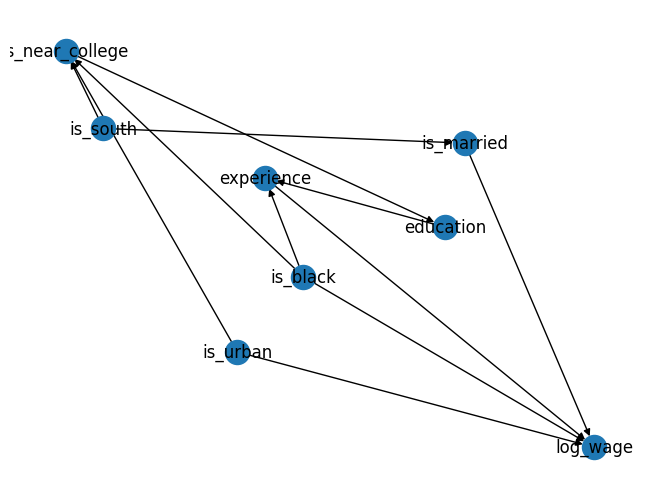

In [7]:
nx.draw(G, with_labels=True,)
plt.draw()

Test permutations of given graph: 100%|██████████| 20/20 [32:25<00:00, 97.25s/it] 


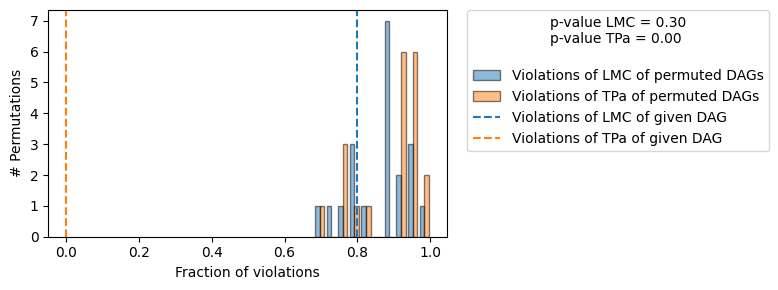

+-------------------------------------------------------------------------------------------------------+
|                                         Falsificaton Summary                                          |
+-------------------------------------------------------------------------------------------------------+
| The given DAG is informative because 0 / 20 of the permutations lie in the Markov                     |
| equivalence class of the given DAG (p-value: 0.00).                                                   |
| The given DAG violates 20/25 LMCs and is better than 70.0% of the permuted DAGs (p-value: 0.30).      |
| Based on the provided significance level (0.05) and because the DAG is informative,                   |
| we reject the DAG.                                                                                    |
+-------------------------------------------------------------------------------------------------------+
|                                             

In [9]:
data.dropna(inplace=True)
result = falsify_graph(G, data, plot_histogram=True, suggestions=True)
print(result)

In [10]:
print(f"Graph is falsifiable: {result.falsifiable}, Graph is falsified: {result.falsified}")

Graph is falsifiable: True, Graph is falsified: True


Test permutations of given graph: 100%|██████████| 20/20 [26:19<00:00, 78.99s/it]


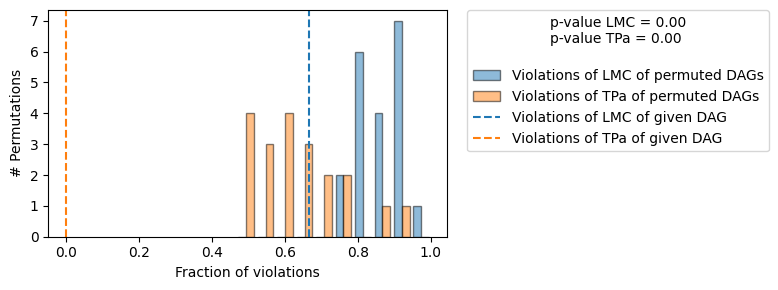

+-------------------------------------------------------------------------------------------------------+
|                                         Falsificaton Summary                                          |
+-------------------------------------------------------------------------------------------------------+
| The given DAG is informative because 0 / 20 of the permutations lie in the Markov                     |
| equivalence class of the given DAG (p-value: 0.00).                                                   |
| The given DAG violates 20/30 LMCs and is better than 100.0% of the permuted DAGs (p-value: 0.00).     |
| Based on the provided significance level (0.05) and because the DAG is informative,                   |
| we do not reject the DAG.                                                                             |
+-------------------------------------------------------------------------------------------------------+
|                                             

In [12]:
G.remove_edges_from(
    [
        (attributes.is_black.translated, attributes.is_near_college.translated),
        (attributes.is_south.translated, attributes.is_married.translated),
    ]
)

result = falsify_graph(G, data, plot_histogram=True, suggestions=True)
print(result)
print(f"Graph is falsifiable: {result.falsifiable}, Graph is falsified: {result.falsified}")